### 問題 
それぞれについてJupyter Notebookにマークダウン形式で記述してください。

(1) 物体検出の分野にはどういった手法が存在したか。
(2) Fasterとあるが、どういった仕組みで高速化したのか。
(3) One-Stageの手法とTwo-Stageの手法はどう違うのか。
(4) RPNとは何か。
(5) RoIプーリングとは何か。
(6) Anchorのサイズはどうするのが適切か。
(7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。
(8) （アドバンス課題）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。

### 条件 
・答える際は論文のどの部分からそれが分かるかを書く。
・必要に応じて先行研究（引用されている論文）も探しにいく。最低2つは他の論文を利用して回答すること。
・論文の紹介記事を見ても良い。ただし、答えは論文内に根拠を探すこと。

### (1) 物体検出の分野にはどういった手法が存在したか。
回答
SPPnet、Fast R-CNN

論文　Abstract部
Abstract—State-of-the-art object detection networks depend on region proposal algorithms to hypothesize object locations. Advances like SPPnet [1] and Fast R-CNN [2] have reduced the running time of these detection networks, exposing region proposal computation as a bottleneck. In this work, we introduce a Region Proposal Network (RPN) that shares full-image convolutionalfeatureswiththedetectionnetwork,thusenablingnearlycost-freeregionproposals.

### (2) Fasterとあるが、どういった仕組みで高速化したのか。
回答　

Fast R-CNNは領域提示(Region Proposal)が選択的検索[ 4 ]は、設計された低レベル機能に基づいて、スーパーピクセルを貪欲にマージしていたため
時間がかかっていたのを、
領域提示(Region Proposal)作成で畳み込み特徴マップを使用することで、高速化

論文
INTRO部
Now, proposals are the test-time computational bottleneck in state-of-the-art detection systems. 
Region proposal methods typically rely on inexpensive features and economical inference schemes. 
Selective Search [4], one of the most popular methods, greedily merges superpixels based on engineered low-level features. 
Yet when compared to efﬁcient detection networks [2], Selective Search is an order of magnitude slower, at 2 seconds per image in a CPU implementation. 
EdgeBoxes [6] currently provides the best tradeoff between proposal quality and speed, at 0.2 seconds per image. 
Nevertheless, the region proposal step still consumes as much running time as the detection network.


On top of these convolutional features, we construct an RPN by adding a few additional convolutional layers that simultaneously regress region bounds and objectness scores at each location on a regular grid. 
The RPN is thus a kind of fully convolutional network (FCN) [7] and can be trained end-toend speciﬁcally for the task for generating detection proposals.

### (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。
One stageとTwo stageの違いについては、領域提案部分が分離されているかされていないかの違いとして捉えられます。これまで取り扱ってきた、R-CNN、SPPnet、Fast R-CNN、Faster R-CNNはどれも領域提案部分がCNNを使おうが使うまいが独立していたのに対し、One stageでは処理が一度で済むような計算となっています。Abstractを軽く要約しておきます。



In this work, we introduce a Region Proposal Network (RPN) that 
shares full-image convolutional features with the detection network,thusenabling nearly cost-free region proposals.

An RPN is a fully convolutional network that simultaneously predicts object bounds and objectness scores at each position. 
The RPN is trained end-to-end to generate high-quality region proposals, 
which are used by Fast R-CNN for detection. 

We further merge RPN and Fast R-CNN into a single network by sharing their convolutional features—using the recently popular terminology of neural networks with “attention” mechanisms, 
the RPN component tells the uniﬁed network where to look. 

和訳
私たちが提供するRegion Proposal Network (RPN) は
検出ネットワークと完全画像畳み込み機能を共有し、ほぼ無料で領域提示を行うことが出来ます。

RPNは完全画像畳み込みネットワークで、各位置でオブジェクトの境界とオブジェクトのスコアを同時に予測します。

RPNは、Fast R-CNNが検出に使用する高品質の領域提示を生成するためにエンドツーエンドで学習します。

畳み込み機能を共有する事と、最近注目されている“attention”メカニズムを備えたニューラルネットワークの用語を使用する事
により、RPNとFast R-CNNを単一のネットワークにさらにマージします。
RPNコンポーネントは統一されたネットワークにどこを見ればよいかを伝えます。

### (4) RPNとは何か。
回答
Region ProposalをCNNで行う処理。

論文
we introduce a Region Proposal Network (RPN) that 
shares full-image convolutional features with the detection network,thusenabling nearly cost-free region proposals.

An RPN is a fully convolutional network that simultaneously predicts object bounds and objectness scores at each position. 
The RPN is trained end-to-end to generate high-quality region proposals,

### (5) RoIプーリングとは何か。
回答
CNNで処理されたReigion Proposalについて、対応する入力特徴マップのセクションを取り、
予め定義されたサイズ（例えば、7×7）にスケールすること。

論文
bounding-box regression is performed on features pooled from arbitrarily sized RoIs, and the regression weights are shared by all region sizes. In our formulation, the features used for regression are of the same spatial size (3 × 3) on the feature maps. 

### (6) Anchorのサイズはどうするのが適切か。
回答
アンカーの設定を調査します。デフォルトでは、3つのスケールと3つのアスペクト比を使用します（表VIIIの 69.9％mAP  ）。各位置でアンカーを1つだけ使用すると、mAPは3〜4％の大幅なマージンで低下します。3スケール（1アスペクト比）または3アスペクト比（1スケール）を使用する場合、mAPは高くなり、複数のサイズのアンカーを回帰参照として使用することが効果的なソリューションであることを示しています。

論文
 In Table 8 we investigate the settings of anchors. By default we use
3 scales and 3 aspect ratios (69.9% mAP in Table 8). If using just one anchor at each position, the mAP drops by a considerable margin of 3-4%. The mAP is higher if using 3 scales (with 1 aspect ratio) or 3 aspect ratios (with 1 scale), demonstrating that using anchors of multiple sizes as the regression references is an effective solution. Using just 3 scales with 1 aspect ratio (69.8%) is as good as using 3 scales with 3 aspect ratios on this dataset, suggesting that scales and aspect ratios are not disentangled dimensions for the detection accuracy. 
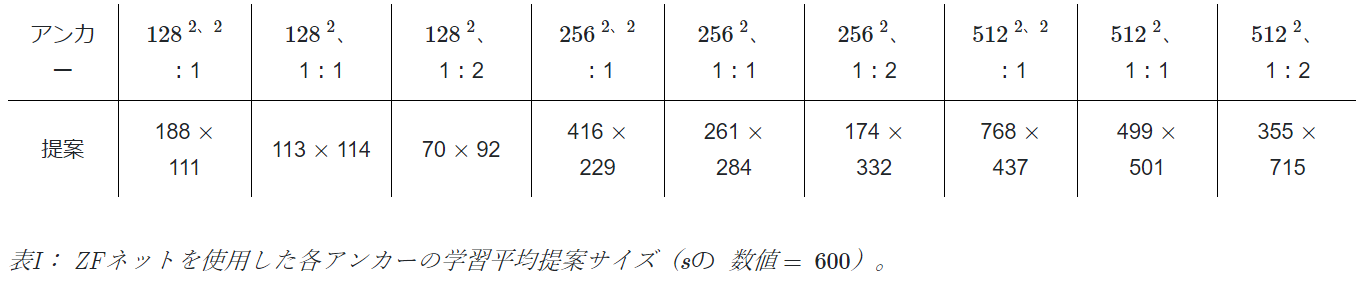

### (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。
回答
